# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import owm_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

635

In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={owm_api_key}={units}&q="

In [5]:
import pprint

In [6]:
print(cities)

['saint-joseph', 'nanortalik', 'barentsburg', 'longyearbyen', 'nizhneyansk', 'semey', 'albany', 'ushuaia', 'vestmannaeyjar', 'hereford', 'norman wells', 'sola', 'san lorenzo', 'horki', 'hobart', 'port lincoln', 'victoria', 'demba', 'busselton', 'ruwi', 'balakovo', 'the pas', 'aberdeen', 'torbay', 'svetlyy', 'vaini', 'hermanus', 'airai', 'manicore', 'ocampo', 'georgetown', 'khatanga', 'atuona', 'illoqqortoormiut', 'dabola', 'martapura', 'kota bahru', 'ponta do sol', 'rio grande', 'serta', 'ust-kuyga', 'kupang', 'upernavik', 'butaritari', 'amga', 'labuhan', 'new panay', 'gemena', 'beringovskiy', 'fortuna', 'irimbo', 'ukiah', 'puerto ayora', 'klaksvik', 'kutum', 'kapaa', 'mingyue', 'santa isabel do rio negro', 'julich', 'bandarbeyla', 'tessalit', 'kaabong', 'castro', 'ribeira grande', 'reguengos de monsaraz', 'saint anthony', 'porto belo', 'puri', 'port elizabeth', 'shieli', 'general roca', 'koshurnikovo', 'rikitea', 'san quintin', 'port blair', 'tuktoyaktuk', 'tutoia', 'saskylakh', 'asau

In [7]:
city_list =[]
country =[]
cloudiness =[]
lat=[]
lng=[]
humidity=[]
max_temp=[]
windspeed=[]

In [8]:
for city in cities:
    try:
        response= requests.get(query_url + city)
        response_json = response.json()
        lattitude=response_json['coord']['lat']
        lat.append(lattitude)
        temperature=response_json['main']['temp_max']
        max_temp.append(temperature)
        clouds=response_json['clouds']['all']
        cloudiness.append(clouds)
        humid=response_json['main']['humidity']
        humidity.append(humid)
        wind=response_json['wind']['speed']
        windspeed.append(wind)
        ctry=response_json['sys']['country']
        country.append(ctry)
        city_name=response_json['name']
        city_list.append(city_name)
        print(f'The city is : {city}, the lattitude is {lattitude}, the temperature is {temperature}, the cloudiness is {clouds}, the humidity is {humid}, the windspeed is {wind}')
    except (KeyError, IndexError):
        print("City not found... skipping.")


The city is : saint-joseph, the lattitude is 43.56, the temperature is 31.67, the cloudiness is 75, the humidity is 78, the windspeed is 1.5
The city is : nanortalik, the lattitude is 60.14, the temperature is 8.6, the cloudiness is 100, the humidity is 72, the windspeed is 0.42
City not found... skipping.
The city is : longyearbyen, the lattitude is 78.22, the temperature is 9, the cloudiness is 0, the humidity is 76, the windspeed is 2.1
City not found... skipping.
The city is : semey, the lattitude is 50.41, the temperature is 25, the cloudiness is 0, the humidity is 57, the windspeed is 8
The city is : albany, the lattitude is 42.65, the temperature is 30.56, the cloudiness is 20, the humidity is 39, the windspeed is 2.1
The city is : ushuaia, the lattitude is -54.81, the temperature is 5, the cloudiness is 20, the humidity is 93, the windspeed is 2.14
The city is : vestmannaeyjar, the lattitude is 63.44, the temperature is 12, the cloudiness is 20, the humidity is 93, the windspee

The city is : saint anthony, the lattitude is 43.97, the temperature is 28, the cloudiness is 1, the humidity is 39, the windspeed is 0.7
The city is : porto belo, the lattitude is -27.15, the temperature is 16.67, the cloudiness is 75, the humidity is 82, the windspeed is 4.6
The city is : puri, the lattitude is -7.54, the temperature is 21.4, the cloudiness is 2, the humidity is 81, the windspeed is 4.54
The city is : port elizabeth, the lattitude is 39.31, the temperature is 31.67, the cloudiness is 20, the humidity is 74, the windspeed is 4.6
The city is : shieli, the lattitude is 44.18, the temperature is 23, the cloudiness is 0, the humidity is 21, the windspeed is 3.91
The city is : general roca, the lattitude is -39.03, the temperature is 14, the cloudiness is 0, the humidity is 28, the windspeed is 3.6
The city is : koshurnikovo, the lattitude is 54.3, the temperature is 15.5, the cloudiness is 0, the humidity is 89, the windspeed is 0.91
The city is : rikitea, the lattitude i

The city is : caledon, the lattitude is 43.88, the temperature is 29.44, the cloudiness is 20, the humidity is 34, the windspeed is 6.7
City not found... skipping.
The city is : mahebourg, the lattitude is -20.41, the temperature is 22, the cloudiness is 20, the humidity is 73, the windspeed is 4.1
The city is : mao, the lattitude is 19.55, the temperature is 34.44, the cloudiness is 40, the humidity is 49, the windspeed is 7.2
The city is : flin flon, the lattitude is 54.77, the temperature is 24, the cloudiness is 75, the humidity is 57, the windspeed is 3.6
City not found... skipping.
The city is : lavrentiya, the lattitude is 65.58, the temperature is 6.6, the cloudiness is 100, the humidity is 95, the windspeed is 7.11
The city is : kruisfontein, the lattitude is -34, the temperature is 13.3, the cloudiness is 57, the humidity is 86, the windspeed is 7.29
The city is : avera, the lattitude is 33.19, the temperature is 34, the cloudiness is 75, the humidity is 46, the windspeed is 

The city is : makakilo city, the lattitude is 21.35, the temperature is 31, the cloudiness is 1, the humidity is 58, the windspeed is 5.1
The city is : sao jose da coroa grande, the lattitude is -8.9, the temperature is 21.8, the cloudiness is 99, the humidity is 91, the windspeed is 2.02
The city is : yerbogachen, the lattitude is 61.28, the temperature is 12.3, the cloudiness is 87, the humidity is 97, the windspeed is 2.09
The city is : ulkan, the lattitude is 57.24, the temperature is 12.7, the cloudiness is 0, the humidity is 93, the windspeed is 1.04
The city is : mezhdurechensk, the lattitude is 53.69, the temperature is 16, the cloudiness is 0, the humidity is 93, the windspeed is 1.27
The city is : khandbari, the lattitude is 27.38, the temperature is 14.7, the cloudiness is 100, the humidity is 88, the windspeed is 0.67
The city is : vincennes, the lattitude is 48.85, the temperature is 25, the cloudiness is 0, the humidity is 50, the windspeed is 3.6
The city is : zhangye, t

The city is : samarai, the lattitude is -10.62, the temperature is 22.6, the cloudiness is 100, the humidity is 95, the windspeed is 4.35
The city is : saldanha, the lattitude is 41.42, the temperature is 24.4, the cloudiness is 0, the humidity is 38, the windspeed is 4.13
The city is : lumphat, the lattitude is 13.5, the temperature is 23, the cloudiness is 100, the humidity is 98, the windspeed is 2.77
City not found... skipping.
The city is : sobolevo, the lattitude is 54.43, the temperature is 10.7, the cloudiness is 37, the humidity is 91, the windspeed is 2.34
The city is : tura, the lattitude is 64.27, the temperature is 8.4, the cloudiness is 0, the humidity is 87, the windspeed is 2.17
The city is : tervel, the lattitude is 43.43, the temperature is 21.5, the cloudiness is 57, the humidity is 69, the windspeed is 1.7
The city is : japura, the lattitude is -0.42, the temperature is 22, the cloudiness is 17, the humidity is 83, the windspeed is 1.43
The city is : maniitsoq, the 

The city is : mongo, the lattitude is -5.62, the temperature is 22.1, the cloudiness is 0, the humidity is 63, the windspeed is 4.27
City not found... skipping.
The city is : akita, the lattitude is 39.72, the temperature is 24, the cloudiness is 18, the humidity is 92, the windspeed is 1.72
The city is : ballina, the lattitude is 54.11, the temperature is 22, the cloudiness is 75, the humidity is 68, the windspeed is 2.1
The city is : sechura, the lattitude is -5.56, the temperature is 17.1, the cloudiness is 44, the humidity is 89, the windspeed is 8.78
The city is : chabahar, the lattitude is 25.29, the temperature is 30, the cloudiness is 5, the humidity is 79, the windspeed is 3.1
The city is : tasiilaq, the lattitude is 65.61, the temperature is 9, the cloudiness is 20, the humidity is 70, the windspeed is 5.7
The city is : qaqortoq, the lattitude is 60.72, the temperature is 21, the cloudiness is 40, the humidity is 26, the windspeed is 9.3
The city is : yamada, the lattitude is

The city is : rovinj, the lattitude is 45.08, the temperature is 21, the cloudiness is 40, the humidity is 82, the windspeed is 7.2
The city is : kidal, the lattitude is 18.44, the temperature is 38.7, the cloudiness is 34, the humidity is 11, the windspeed is 3.68
The city is : chippewa falls, the lattitude is 44.94, the temperature is 28.89, the cloudiness is 75, the humidity is 54, the windspeed is 2.13
The city is : manavalakurichi, the lattitude is 8.13, the temperature is 28, the cloudiness is 40, the humidity is 83, the windspeed is 1.5
City not found... skipping.
The city is : camacha, the lattitude is 33.08, the temperature is 24, the cloudiness is 40, the humidity is 78, the windspeed is 4.6
The city is : chokurdakh, the lattitude is 70.62, the temperature is 5.5, the cloudiness is 0, the humidity is 64, the windspeed is 4
The city is : souillac, the lattitude is 45.6, the temperature is 25, the cloudiness is 0, the humidity is 53, the windspeed is 4.6
The city is : roma, the

The city is : muisne, the lattitude is 0.61, the temperature is 28, the cloudiness is 75, the humidity is 74, the windspeed is 2.6
The city is : zeltweg, the lattitude is 47.19, the temperature is 20, the cloudiness is 34, the humidity is 87, the windspeed is 1
The city is : nhulunbuy, the lattitude is -12.18, the temperature is 21, the cloudiness is 66, the humidity is 88, the windspeed is 2.6
The city is : vondrozo, the lattitude is -22.82, the temperature is 17.4, the cloudiness is 100, the humidity is 92, the windspeed is 1.72
The city is : saint-pierre, the lattitude is 48.95, the temperature is 24, the cloudiness is 0, the humidity is 53, the windspeed is 4.1
The city is : bonthe, the lattitude is 7.53, the temperature is 24.4, the cloudiness is 100, the humidity is 88, the windspeed is 6.07
The city is : bermejo, the lattitude is -22.73, the temperature is 18.5, the cloudiness is 2, the humidity is 18, the windspeed is 2.51
The city is : medzilaborce, the lattitude is 49.27, the

City not found... skipping.
The city is : christchurch, the lattitude is -43.53, the temperature is 7.78, the cloudiness is 31, the humidity is 74, the windspeed is 6.2
City not found... skipping.
The city is : guerrero negro, the lattitude is 27.97, the temperature is 20.4, the cloudiness is 0, the humidity is 87, the windspeed is 5.7
The city is : del rio, the lattitude is 29.36, the temperature is 36, the cloudiness is 1, the humidity is 37, the windspeed is 4.1
The city is : salalah, the lattitude is 17.01, the temperature is 26, the cloudiness is 90, the humidity is 94, the windspeed is 1.5
The city is : eagle pass, the lattitude is 28.71, the temperature is 36, the cloudiness is 5, the humidity is 47, the windspeed is 4.1
The city is : naujamiestis, the lattitude is 55.69, the temperature is 14, the cloudiness is 0, the humidity is 71, the windspeed is 2.1
The city is : nizhnevartovsk, the lattitude is 60.93, the temperature is 19, the cloudiness is 40, the humidity is 93, the wi

The city is : parana, the lattitude is -7.52, the temperature is 33, the cloudiness is 75, the humidity is 46, the windspeed is 0.5
The city is : mudkhed, the lattitude is 19.15, the temperature is 23, the cloudiness is 100, the humidity is 93, the windspeed is 6.47
The city is : kungalv, the lattitude is 57.87, the temperature is 19.44, the cloudiness is 0, the humidity is 55, the windspeed is 3.1
The city is : gao, the lattitude is 16.28, the temperature is 38.3, the cloudiness is 69, the humidity is 22, the windspeed is 5.2
The city is : nova vicosa, the lattitude is -17.89, the temperature is 22.8, the cloudiness is 0, the humidity is 73, the windspeed is 4.31
The city is : vao, the lattitude is 59.1, the temperature is 12.1, the cloudiness is 1, the humidity is 70, the windspeed is 3.3
The city is : carballo, the lattitude is 43.21, the temperature is 23.89, the cloudiness is 0, the humidity is 73, the windspeed is 2.6
The city is : santa marta, the lattitude is 11.24, the tempera

In [9]:
print(response_json)

{'coord': {'lon': 41.69, 'lat': 13.93}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 32.9, 'pressure': 1005.77, 'humidity': 51, 'temp_min': 32.9, 'temp_max': 32.9, 'sea_level': 1005.77, 'grnd_level': 992.74}, 'wind': {'speed': 1.49, 'deg': 346.057}, 'clouds': {'all': 100}, 'dt': 1564774400, 'sys': {'message': 0.0065, 'country': 'ER', 'sunrise': 1564714651, 'sunset': 1564760485}, 'timezone': 10800, 'id': 338345, 'name': 'Edd', 'cod': 200}


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
#Create new Df
weather_df = ({'City': city,
              'Country': country,
              'Lattitude': lat,
              'Max Temperature': max_temp,
              'Cloudiness': cloudiness,
              'Humidity': humidity,
              'Windspeed':windspeed})
print(weather_df)

{'City': 'edd', 'Country': ['FR', 'GL', 'NO', 'KZ', 'US', 'AR', 'IS', 'GB', 'CA', 'TZ', 'HN', 'BY', 'AU', 'AU', 'BN', 'CD', 'AU', 'OM', 'RU', 'CA', 'US', 'CA', 'IN', 'ZA', 'TL', 'BR', 'MX', 'GY', 'RU', 'PF', 'GN', 'ID', 'BR', 'BR', 'IT', 'RU', 'ID', 'GL', 'KI', 'RU', 'ID', 'PH', 'CD', 'RU', 'US', 'MX', 'US', 'EC', 'FO', 'SD', 'US', 'CN', 'BR', 'DE', 'SO', 'ML', 'UG', 'CL', 'PT', 'PT', 'US', 'BR', 'ID', 'US', 'KZ', 'AR', 'RU', 'PF', 'PH', 'IN', 'CA', 'BR', 'RU', 'CA', 'US', 'ZA', 'CA', 'GL', 'CA', 'GL', 'CA', 'CL', 'CA', 'US', 'CO', 'RU', 'AL', 'ET', 'MU', 'AU', 'PH', 'CY', 'ZA', 'NZ', 'BI', 'TH', 'ZA', 'AR', 'AU', 'ZA', 'CA', 'RU', 'PE', 'MX', 'CA', 'BG', 'FO', 'GL', 'BR', 'NA', 'CA', 'AU', 'BR', 'RU', 'AO', 'IR', 'SB', 'AU', 'NZ', 'CA', 'MU', 'DO', 'CA', 'RU', 'ZA', 'US', 'CA', 'CK', 'CA', 'ZA', 'RU', 'MU', 'MX', 'CA', 'AU', 'MX', 'NZ', 'ZA', 'TR', 'RU', 'CG', 'KZ', 'CL', 'ID', 'IN', 'ID', 'PG', 'IN', 'GR', 'CA', 'UG', 'BR', 'DE', 'PA', 'MZ', 'CA', 'ID', 'NZ', 'CN', 'IS', 'PH', 'RU', 

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

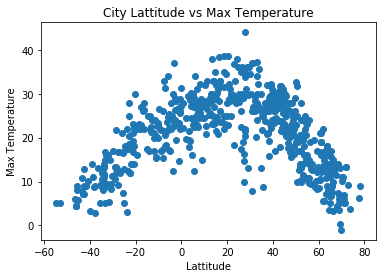

In [11]:
plt.scatter(lat, max_temp)
plt.xlabel('Lattitude')
plt.ylabel('Max Temperature')
plt.title('City Lattitude vs Max Temperature')

plt.savefig('City lat vs max temp')

#### Latitude vs. Humidity Plot

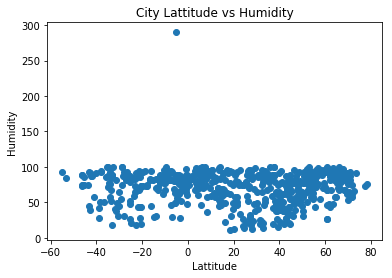

In [12]:
plt.scatter(lat, humidity)
plt.xlabel('Lattitude')
plt.ylabel('Humidity')
plt.title('City Lattitude vs Humidity')
plt.savefig('City lat vs max humidity')

#### Latitude vs. Cloudiness Plot

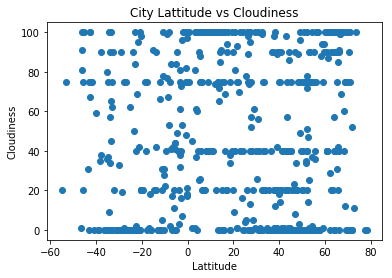

In [13]:
plt.scatter(lat, cloudiness)
plt.xlabel('Lattitude')
plt.ylabel('Cloudiness')
plt.title('City Lattitude vs Cloudiness')
plt.savefig('City lat vs humidity')

#### Latitude vs. Wind Speed Plot

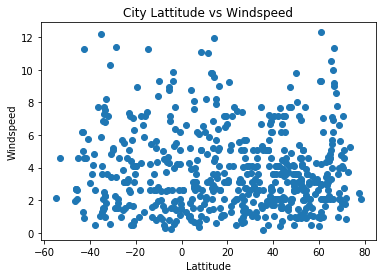

In [14]:
plt.scatter(lat, windspeed)
plt.xlabel('Lattitude')
plt.ylabel('Windspeed')
plt.title('City Lattitude vs Windspeed')
plt.savefig('City lat vs windiness')